In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri, numpy2ri

# Setup to parse to R
pandas2ri.activate()

# Import R libraries
ts = ro.r('ts')
forecast = importr('forecast')
thetaModel = importr('forecTheta')

In [3]:
"""Convert an R matrix into a Pandas DataFrame"""
def r_matrix_to_data_frame(r_matrix):
    array = pandas2ri.ri2py(r_matrix)
    
    print(array)
    print("------------------")
    print(r_matrix.names)
    
    return pd.DataFrame(pandas2ri.ri2py(r_matrix),
                        index=r_matrix.names[0],
                        columns=r_matrix.names[1])

In [4]:
import matlab.engine

eng = matlab.engine.start_matlab()

### Load some data

In [147]:
data = np.array([1,2,3])

### R

In [156]:
# Pass data to R
rdata = ts(data, frequency = 1)

fit = forecast.auto_arima(rdata)
forecast_output = forecast.forecast(fit, h=16, level=(95.0))

# Pass back to python
rForecastData = pd.Series(forecast_output[3])
rPd = r_matrix_to_data_frame(forecast_output[3])

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
------------------
NULL


TypeError: 'rpy2.rinterface.RNULLType' object is not subscriptable

In [170]:
type(forecast_output[3])

ModuleNotFoundError: No module named 'pandas.rpy'

In [190]:
type(forecast_output[4])

rpy2.robjects.vectors.Matrix

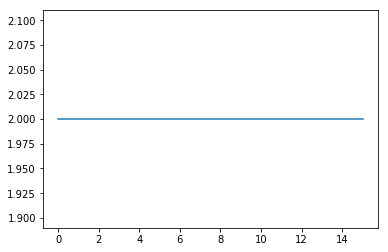

In [150]:
plt.plot(rForecastData[0])

### Matlab 

In [151]:
f = 1

# Generate a noisy sin of 0.4 hz at 1000 sample
samples = np.linspace(0, 2 * np.pi, 1000, endpoint=False)
signal = np.sin(f * samples) + 0.25 * np.random.rand(len(samples))

In [152]:
# Pass data to matlab
mData =  matlab.double(signal.tolist())

# Use matlab to lowpass filter
mResult = eng.lowpass(mData, 0.8, 1000)

# Pass back to numpy
result =  np.asarray(mResult)

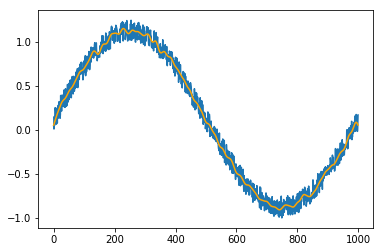

In [154]:
plt.plot(signal)
plt.plot(result[0], c='orange')

In [110]:
len(result[0])

1000

In [199]:
input_dataframe = pd.DataFrame([[1,2,3], [4,5,6]], columns = ['A', 'B', 'C'])

In [202]:
# First, convert the input dataframe to an R dataframe to be used by our R function:
input_dataframe_r = pandas2ri.py2ri(input_dataframe)

In [203]:
output_dataframe_py = pandas2ri.ri2py_dataframe(input_dataframe_r)

c:\program files\python36\lib\site-packages\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [204]:
output_dataframe_py

,A,B,C
0,1,2,3
1,4,5,6


### Nest loop

In [13]:
for i in range(0, 10):
    print(ro.r('for (year in c(2010,2011,2012,2013,2014,2015)){print("Hi for R")}'))
    print()

NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL
NULL


In [7]:
ro.r('print("hi")')

array(['hi'], dtype='<U2')